In [11]:
#! pip install pandas-datareader
from pandas_datareader import DataReader # pip install pandas-datareader
from pandas_datareader import data
from datetime import datetime
import pandas as pd
 
start = pd.to_datetime('2010-01-01') # in YYYY-MM-DD format
end = pd.to_datetime('today')
dataframe_name = data.DataReader('NDAQ', 'yahoo', start , end) # here 'yahoo' is the API to yahoo

In [10]:
dataframe_name.loc['2019-04-04']

High             89.629997
Low              88.669998
Open             89.300003
Close            89.180000
Volume       487800.000000
Adj Close        86.483864
Name: 2019-04-04 00:00:00, dtype: float64

<AxesSubplot:xlabel='Date'>

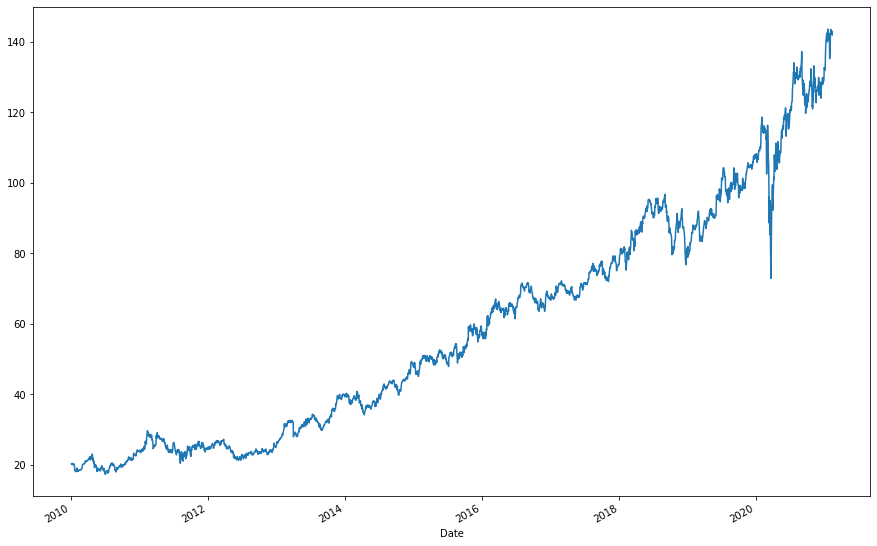

In [27]:
dataframe_name.Close.plot(figsize=(15,10))